# Groupal analysis notebook for Double T-maze task

### Trial condition

- Allostatic_agent_data4 and Control_agent_data4: 0.005.0005, 0.0004, 0.0003, 0.01 - Time=2000
- Allostatic_agent_data5 : 0.005, 0.0005, 0.0004, 0.0003, 0.01 - Security x2 - Time=2000


## Import libraries

In [1]:
from scipy.stats import pearsonr, linregress
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import csv
import os

## Import data

In [2]:
control_folder_path = '../data/Control_agent_data4/'
allostatic_folder_path = '../data/Allostatic_agent_data4/'
allostaticSec_folder_path = '../data/Allostatic_agent_data5/'

In [3]:
control_csv_files = [f for f in os.listdir(control_folder_path) if os.path.isfile(os.path.join(control_folder_path, f))]
print("CSV files in the control directory:", control_csv_files)
control_n_experiments = len(control_csv_files)
print("Total control experiments =", control_n_experiments)
print()

allostatic_csv_files = [f for f in os.listdir(allostatic_folder_path) if os.path.isfile(os.path.join(allostatic_folder_path, f))]
print("CSV files in the allostatic directory:", allostatic_csv_files)
allostatic_n_experiments = len(allostatic_csv_files)
print("Total allostatic experiments =", allostatic_n_experiments)
print()

allostaticSec_csv_files = [f for f in os.listdir(allostaticSec_folder_path) if os.path.isfile(os.path.join(allostaticSec_folder_path, f))]
print("CSV files in the allostaticSec directory:", allostaticSec_csv_files)
allostaticSec_n_experiments = len(allostaticSec_csv_files)
print("Total allostaticSec experiments =", allostaticSec_n_experiments)
print()

CSV files in the control directory: ['7.csv', '10.csv', '20.csv', '12.csv', '17.csv', '1.csv', '3.csv', '16.csv', '11.csv', '14.csv', '6.csv', '2.csv', '19.csv', '18.csv', '13.csv', '5.csv', '4.csv', '9.csv', '15.csv', '8.csv']
Total control experiments = 20

CSV files in the allostatic directory: ['7.csv', '10.csv', '20.csv', '12.csv', '17.csv', '1.csv', '3.csv', '16.csv', '11.csv', '14.csv', '6.csv', '2.csv', '19.csv', '18.csv', '13.csv', '5.csv', '4.csv', '9.csv', '15.csv', '8.csv']
Total allostatic experiments = 20

CSV files in the allostaticSec directory: ['7.csv', '10.csv', '20.csv', '12.csv', '17.csv', '1.csv', '3.csv', '16.csv', '11.csv', '14.csv', '6.csv', '2.csv', '19.csv', '18.csv', '13.csv', '5.csv', '4.csv', '9.csv', '15.csv', '8.csv']
Total allostaticSec experiments = 20



In [4]:
control_csv_order = []
for i in range(control_n_experiments):
    control_csv_order.append(int(control_csv_files[i][:-4]))
    
allostatic_csv_order = []
for i in range(allostatic_n_experiments):
    allostatic_csv_order.append(int(allostatic_csv_files[i][:-4]))

allostaticSec_csv_order = []
for i in range(allostaticSec_n_experiments):
    allostaticSec_csv_order.append(int(allostaticSec_csv_files[i][:-4]))



control_sorted_pairs = sorted(zip(control_csv_order, control_csv_files))
allostatic_sorted_pairs = sorted(zip(allostatic_csv_order, allostatic_csv_files))
allostaticSec_sorted_pairs = sorted(zip(allostaticSec_csv_order, allostaticSec_csv_files))

control_sorted_list1, control_sorted_csv_files = zip(*control_sorted_pairs)
allostatic_sorted_list1, allostatic_sorted_csv_files = zip(*allostatic_sorted_pairs)
allostaticSec_sorted_list1, allostaticSec_sorted_csv_files = zip(*allostaticSec_sorted_pairs)


In [5]:
control_data = []
for i in range(control_n_experiments):
    control_csv_filename = control_folder_path + control_sorted_csv_files[i]
    control_data.append(pd.read_csv(control_csv_filename))
    
allostatic_data = []
for i in range(allostatic_n_experiments):
    allostatic_csv_filename = allostatic_folder_path + allostatic_sorted_csv_files[i]
    allostatic_data.append(pd.read_csv(allostatic_csv_filename))

allostaticSec_data = []
for i in range(allostaticSec_n_experiments):
    allostaticSec_csv_filename = allostaticSec_folder_path + allostaticSec_sorted_csv_files[i]
    allostaticSec_data.append(pd.read_csv(allostaticSec_csv_filename))

In [6]:
for i in range(control_n_experiments):
    control_data[i]['Row_index'] = control_data[i].index
print('Number of columns in control agent= ' + str(control_data[0].shape[1]))
print('Number of rows in control agent= ' + str(control_data[0].shape[0]))
control_data[0]

Number of columns in control agent= 17
Number of rows in control agent= 16092


Trial_number  Trial_time  Gradient_T        X        Y          Z  \
0                 0     0.03200     0.95701 -0.01485 -0.00208  342.37838   
1                 0     0.22400     0.95701 -0.01580 -0.00014  356.21487   
2                 0     0.35200     0.95701 -0.01155  0.00159    6.91466   
3                 0     0.48000     0.95701 -0.00627  0.00192   14.46127   
4                 0     0.67200     0.95701  0.00141  0.00018   18.43962   
...             ...         ...         ...      ...      ...        ...   
16087             0  1999.42395     0.93054 -0.35206  0.14567  106.86911   
16088             0  1999.55200     0.93054 -0.35552  0.13499  101.96374   
16089             0  1999.68005     0.93054 -0.35769  0.12285  105.43896   
16090             0  1999.77600     0.93054 -0.35944  0.11402  111.62258   
16091             0  1999.93604     0.93054 -0.36465  0.10149  112.11584   

       IS_temperature  IS_hydration  IS_energy  IS_security  IS_mating  \
0              0.8995        0.8995     0.1996      1.00000     0.8997   
1              0.8990        0.8990     0.1992      1.00000     0.8994   
2              0.8985        0.8985     0.1988      1.00000     0.8991   
3              0.8980        0.8980     0.1984      1.00000     0.8988   
4              0.8975        0.8975     0.1980      1.00000     0.8985   
...               ...           ...        ...          ...        ...   
16087          1.0000        0.0000     0.0000      0.91771     0.8041   
16088          1.0000        0.0000     0.0000      0.91771     0.8038   
16089          1.0000        0.0000     0.0000      0.91771     0.8035   
16090          1.0000        0.0000     0.0000      0.91771     0.8032   
16091          1.0000        0.0000     0.0000      0.91771     0.8029   

       Att_temperature  Att_hydration  Att_energy  Att_security  Att_mating  \
0             -0.00000       -0.00000     0.09961       0.20970    -0.00000   
1             -0.00000       -0.00000     0.10233       0.17013    -0.00000   
2             -0.00000       -0.00000     0.23999       0.47476     0.02368   
3             -0.00000       -0.00000     0.40664       0.15311    -0.00000   
4             -0.00000        0.00988     0.25116       0.24400    -0.00000   
...                ...            ...         ...           ...         ...   
16087          0.09367        0.11534     0.47466       0.07903     0.03195   
16088          0.10167        0.16172     0.50246       0.06899    -0.00000   
16089          0.13857        0.11661     0.48230       0.05388    -0.00000   
16090          0.09150        0.11398     0.53967       0.00899     0.03533   
16091          0.07104        0.11034     0.51368       0.07580     0.06024   

       Row_index  
0              0  
1              1  
2              2  
3              3  
4              4  
...          ...  
16087      16087  
16088      16088  
16089      16089  
16090      16090  
16091      16091  

[16092 rows x 17 columns]

In [7]:
for i in range(allostatic_n_experiments):
    allostatic_data[i]['Row_index'] = allostatic_data[i].index
print('Number of columns in allostatic agent= ' + str(allostatic_data[0].shape[1]))
print('Number of rows in allostatic agent= ' + str(allostatic_data[0].shape[0]))
allostatic_data[0]

Number of columns in allostatic agent= 17
Number of rows in allostatic agent= 16170


Trial_number  Trial_time  Gradient_T        X        Y          Z  \
0                 0     0.03200     0.95701  0.00000 -0.00749  269.99958   
1                 0     0.28800     0.95701  0.00000 -0.00690  269.99958   
2                 0     0.41600     0.95701  0.00000 -0.00671  269.99958   
3                 0     0.54400     0.95701 -0.00008 -0.00203  270.54093   
4                 0     0.64000     0.95701 -0.00005  0.00937  271.29376   
...             ...         ...         ...      ...      ...        ...   
16165             0  1999.45605     0.93054 -0.76243  1.17023    1.53152   
16166             0  1999.55200     0.93808 -0.75275  1.17001    1.69138   
16167             0  1999.68005     0.93808 -0.73984  1.16967    1.89080   
16168             0  1999.83997     0.93808 -0.72371  1.16918    2.08663   
16169             0  1999.96802     0.93808 -0.71083  1.16871    2.07889   

       IS_temperature  IS_hydration  IS_energy  IS_security  IS_mating  \
0              0.8995        0.8995     0.1996      1.00000     0.8997   
1              0.8990        0.8990     0.1992      1.00000     0.8994   
2              0.8985        0.8985     0.1988      1.00000     0.8991   
3              0.8980        0.8980     0.1984      1.00000     0.8988   
4              0.8975        0.8975     0.1980      1.00000     0.8985   
...               ...           ...        ...          ...        ...   
16165          1.0000        0.3340     0.9972      0.19210     0.4309   
16166          1.0000        0.3335     0.9968      0.19210     0.4306   
16167          1.0000        0.3330     0.9964      0.21282     0.4303   
16168          1.0000        0.3325     0.9960      0.21282     0.4300   
16169          1.0000        0.3320     0.9956      0.21282     0.4297   

       Att_temperature  Att_hydration  Att_energy  Att_security  Att_mating  \
0              0.01744        0.23899     0.09735       0.00325     0.11671   
1             -0.00000        0.35247     0.09962      -0.00000     0.13163   
2              0.23244        0.34583    -0.00000       0.08057     0.27405   
3              0.34904        0.15185     0.00144       0.17909     0.23281   
4              0.11424        0.03910    -0.00000       0.10516     0.24037   
...                ...            ...         ...           ...         ...   
16165          0.06853        0.41756     0.04698       0.13392     0.08205   
16166          0.05875        0.43800     0.02268       0.10193     0.06519   
16167          0.10955        0.40816     0.01983       0.11187     0.02284   
16168          0.07751        0.43733    -0.00000       0.09848    -0.00000   
16169          0.05334        0.41841    -0.00000       0.08876    -0.00000   

       Row_index  
0              0  
1              1  
2              2  
3              3  
4              4  
...          ...  
16165      16165  
16166      16166  
16167      16167  
16168      16168  
16169      16169  

[16170 rows x 17 columns]

In [8]:
for i in range(allostaticSec_n_experiments):
    allostaticSec_data[i]['Row_index'] = allostaticSec_data[i].index
print('Number of columns in allostaticSec agent= ' + str(allostaticSec_data[0].shape[1]))
print('Number of rows in allostaticSec agent= ' + str(allostaticSec_data[0].shape[0]))
allostaticSec_data[0]

Number of columns in allostaticSec agent= 17
Number of rows in allostaticSec agent= 15800


Trial_number  Trial_time  Gradient_T        X        Y          Z  \
0                 0     0.03200     0.95701  0.00000 -0.00741  269.99958   
1                 0     0.28800     0.95701  0.00000 -0.00690  269.99958   
2                 0     0.44800     0.95701  0.00000 -0.00666  269.99958   
3                 0     0.57600     0.95701 -0.00005 -0.00636  270.27102   
4                 0     0.64000     0.95701 -0.00008  0.00339  270.80032   
...             ...         ...         ...      ...      ...        ...   
15795             0  1999.48804     0.94164 -0.10216 -0.39867  177.01908   
15796             0  1999.61597     0.94164 -0.11496 -0.39948  180.85593   
15797             0  1999.71204     0.94164 -0.12377 -0.39950  182.12691   
15798             0  1999.83997     0.94164 -0.13720 -0.39932  187.12564   
15799             0  1999.96802     0.94164 -0.15000 -0.39799  191.59275   

       IS_temperature  IS_hydration  IS_energy  IS_security  IS_mating  \
0              0.8995        0.8995     0.1996      1.00000     0.8997   
1              0.8990        0.8990     0.1992      1.00000     0.8994   
2              0.8985        0.8985     0.1988      1.00000     0.8991   
3              0.8980        0.8980     0.1984      1.00000     0.8988   
4              0.8975        0.8975     0.1980      1.00000     0.8985   
...               ...           ...        ...          ...        ...   
15795          1.0000        0.6955     0.7168      0.59203     0.7793   
15796          1.0000        0.6950     0.7164      0.59203     0.7890   
15797          1.0000        0.6945     0.7160      0.59203     0.7987   
15798          1.0000        0.6940     0.7156      0.59203     0.8084   
15799          1.0000        0.6935     0.7152      0.59203     0.8181   

       Att_temperature  Att_hydration  Att_energy  Att_security  Att_mating  \
0              0.11206       -0.00000    -0.00000       0.08378     0.02916   
1              0.18179        0.12017     0.11926       0.26659     0.04902   
2              0.17001        0.25371     0.37846       0.42527    -0.00000   
3              0.26044        0.03890     0.24037       0.52193     0.09105   
4              0.19509       -0.00000     0.19717       0.77540     0.06872   
...                ...            ...         ...           ...         ...   
15795          0.16139        0.08754     0.07125       0.04381     0.41924   
15796          0.12625        0.10213     0.08023      -0.00000     0.38669   
15797          0.08133        0.14126     0.08366      -0.00000     0.38230   
15798          0.04101        0.19255     0.05491      -0.00000     0.36260   
15799          0.00950        0.16954     0.05015       0.02116     0.35630   

       Row_index  
0              0  
1              1  
2              2  
3              3  
4              4  
...          ...  
15795      15795  
15796      15796  
15797      15797  
15798      15798  
15799      15799  

[15800 rows x 17 columns]

## Variable formatting

In [9]:
control_Xpose = []
control_Ypose = []
control_meanXpose = []
control_meanYpose = []
control_IS_temperature = []
control_IS_hydration = []
control_IS_energy = []
control_IS_security = []
control_IS_mating = []
control_gradient_temp = []
control_trial_time = []


for i in range(control_n_experiments):
    control_Xpose.append(control_data[i]['X'].to_list())
    control_Ypose.append(control_data[i]['Y'].to_list())
    control_meanXpose.append(np.mean(control_Xpose[i]))
    control_meanYpose.append(np.mean(control_Ypose[i]))
    control_IS_temperature.append(control_data[i]['IS_temperature'].to_list())
    control_IS_hydration.append(control_data[i]['IS_hydration'].to_list())
    control_IS_energy.append(control_data[i]['IS_energy'].to_list())
    control_IS_security.append(control_data[i]['IS_security'].to_list())
    control_IS_mating.append(control_data[i]['IS_mating'].to_list())
    control_gradient_temp.append(control_data[i]['Gradient_T'].to_list())
    control_trial_time.append(control_data[i]['Trial_time'].to_list())

In [10]:
allostatic_Xpose = []
allostatic_Ypose = []
allostatic_meanXpose = []
allostatic_meanYpose = []
allostatic_IS_temperature = []
allostatic_IS_hydration = []
allostatic_IS_energy = []
allostatic_IS_security = []
allostatic_IS_mating = []
allostatic_gradient_temp = []
allostatic_trial_time = []


for i in range(allostatic_n_experiments):
    allostatic_Xpose.append(allostatic_data[i]['X'].to_list())
    allostatic_Ypose.append(allostatic_data[i]['Y'].to_list())
    allostatic_meanXpose.append(np.mean(allostatic_Xpose[i]))
    allostatic_meanYpose.append(np.mean(allostatic_Ypose[i]))
    allostatic_IS_temperature.append(allostatic_data[i]['IS_temperature'].to_list())
    allostatic_IS_hydration.append(allostatic_data[i]['IS_hydration'].to_list())
    allostatic_IS_energy.append(allostatic_data[i]['IS_energy'].to_list())
    allostatic_IS_security.append(allostatic_data[i]['IS_security'].to_list())
    allostatic_IS_mating.append(allostatic_data[i]['IS_mating'].to_list())
    allostatic_gradient_temp.append(allostatic_data[i]['Gradient_T'].to_list())
    allostatic_trial_time.append(allostatic_data[i]['Trial_time'].to_list())

In [11]:
allostaticSec_Xpose = []
allostaticSec_Ypose = []
allostaticSec_meanXpose = []
allostaticSec_meanYpose = []
allostaticSec_IS_temperature = []
allostaticSec_IS_hydration = []
allostaticSec_IS_energy = []
allostaticSec_IS_security = []
allostaticSec_IS_mating = []
allostaticSec_gradient_temp = []
allostaticSec_trial_time = []


for i in range(allostaticSec_n_experiments):
    allostaticSec_Xpose.append(allostaticSec_data[i]['X'].to_list())
    allostaticSec_Ypose.append(allostaticSec_data[i]['Y'].to_list())
    allostaticSec_meanXpose.append(np.mean(allostaticSec_Xpose[i]))
    allostaticSec_meanYpose.append(np.mean(allostaticSec_Ypose[i]))
    allostaticSec_IS_temperature.append(allostaticSec_data[i]['IS_temperature'].to_list())
    allostaticSec_IS_hydration.append(allostaticSec_data[i]['IS_hydration'].to_list())
    allostaticSec_IS_energy.append(allostaticSec_data[i]['IS_energy'].to_list())
    allostaticSec_IS_security.append(allostaticSec_data[i]['IS_security'].to_list())
    allostaticSec_IS_mating.append(allostaticSec_data[i]['IS_mating'].to_list())
    allostaticSec_gradient_temp.append(allostaticSec_data[i]['Gradient_T'].to_list())
    allostaticSec_trial_time.append(allostaticSec_data[i]['Trial_time'].to_list())

### Control agent trajectory

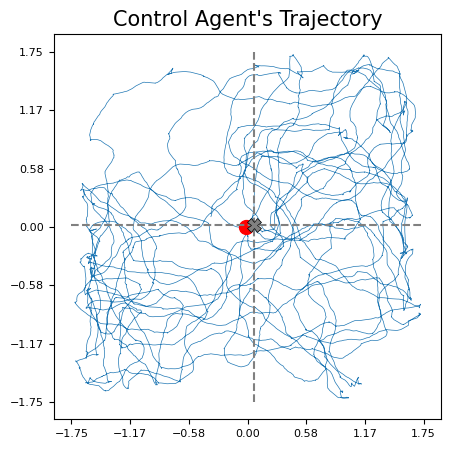

In [178]:
trial = 0

ticks = np.arange(-1.75, 1.8, step=0.5833)
ticks = [round(elem, 2) for elem in ticks]

fig = plt.figure(figsize=(5, 5))
plt.plot(control_Xpose[trial], control_Ypose[trial], linewidth=0.5)

plt.yticks(ticks, fontsize=8)
plt.xticks(ticks, fontsize=8)

plt.title("Control Agent's Trajectory", fontsize=15)
plt.plot(control_Xpose[trial][0],control_Ypose[trial][0],'ro', markersize=10)
plt.plot([np.mean(control_meanXpose), np.mean(control_meanXpose)], [-1.75, 1.75], color='gray', linestyle='dashed', linewidth=1.5)
plt.plot([-1.75, 1.75], [np.mean(control_meanYpose), np.mean(control_meanYpose)], color='gray', linestyle='dashed', linewidth=1.5)
plt.plot(np.mean(control_meanXpose), np.mean(control_meanYpose),'X', color='gray', markersize=10, markeredgecolor='black', markeredgewidth=0.5)

plt.savefig("Plots/control_trajectory.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/control_trajectory.png", format='png', bbox_inches='tight')
plt.show()

### Allostatic agent trajectory

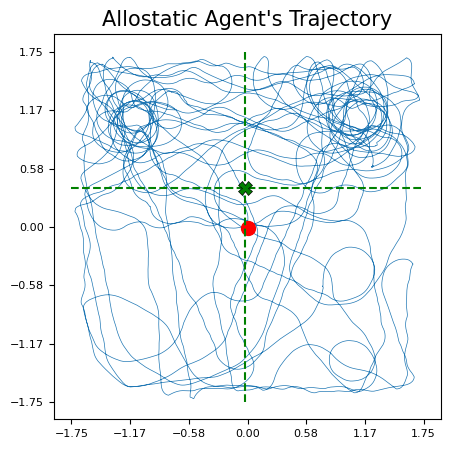

In [179]:
trial = 0
fig = plt.figure(figsize=(5, 5))
plt.plot(allostatic_Xpose[trial], allostatic_Ypose[trial], linewidth=0.5)

plt.yticks(ticks, fontsize=8)
plt.xticks(ticks, fontsize=8)

plt.title("Allostatic Agent's Trajectory", fontsize=15)
plt.plot(allostatic_Xpose[trial][0],allostatic_Ypose[trial][0],'ro', markersize=10)
plt.plot([np.mean(allostatic_meanXpose), np.mean(allostatic_meanXpose)], [-1.75, 1.75], color='green', linestyle='dashed', linewidth=1.5)
plt.plot([-1.75, 1.75], [np.mean(allostatic_meanYpose), np.mean(allostatic_meanYpose)], color='green', linestyle='dashed', linewidth=1.5)
plt.plot(np.mean(allostatic_meanXpose), np.mean(allostatic_meanYpose) ,'Xg', markersize=10, markeredgecolor='black', markeredgewidth=0.5)

plt.savefig("Plots/allostatic_trajectory.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/allostatic_trajectory.png", format='png', bbox_inches='tight')
plt.show()

### AllostaticSec agent trajectory

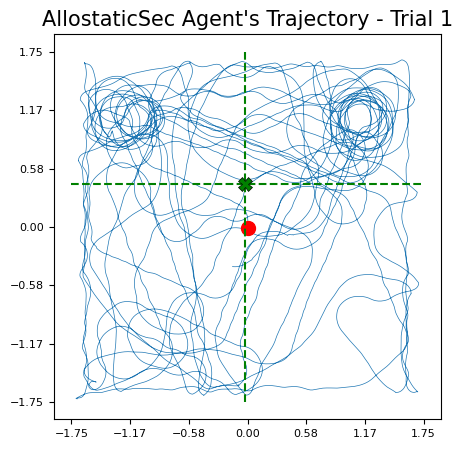

In [180]:
trial = 0
fig = plt.figure(figsize=(5, 5))
plt.plot(allostaticSec_Xpose[trial], allostaticSec_Ypose[trial], linewidth=0.5)

plt.yticks(ticks, fontsize=8)
plt.xticks(ticks, fontsize=8)

plt.title("AllostaticSec Agent's Trajectory - Trial " + allostaticSec_sorted_csv_files[trial][:-4], fontsize=15)
plt.plot(allostaticSec_Xpose[trial][0],allostaticSec_Ypose[trial][0],'ro', markersize=10)
plt.plot([np.mean(allostaticSec_meanXpose), np.mean(allostaticSec_meanXpose)], [-1.75, 1.75], color='green', linestyle='dashed', linewidth=1.5)
plt.plot([-1.75, 1.75], [np.mean(allostaticSec_meanYpose), np.mean(allostaticSec_meanYpose)], color='green', linestyle='dashed', linewidth=1.5)
plt.plot(np.mean(allostaticSec_meanXpose), np.mean(allostaticSec_meanYpose) ,'Xg', markersize=10, markeredgecolor='black', markeredgewidth=0.5)

plt.show()

### Control agent occupancy map

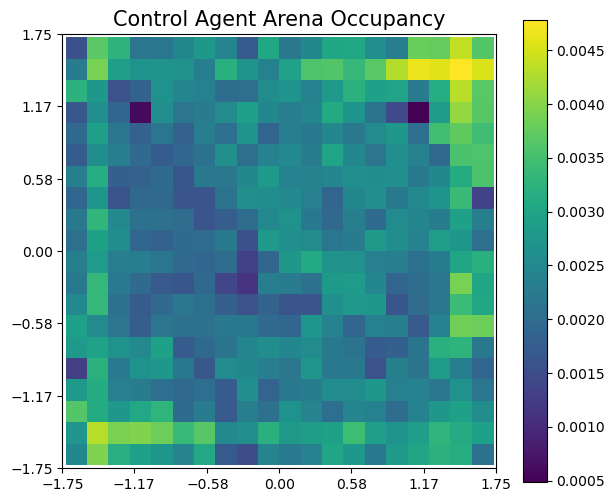

In [185]:
exp_Xpose = np.concatenate(control_Xpose)
exp_Ypose = np.concatenate(control_Ypose)

xy_array = np.column_stack((exp_Xpose, exp_Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 20
xedges = np.linspace(min(exp_Xpose), max(exp_Xpose), bins + 1)
yedges = np.linspace(min(exp_Ypose), max(exp_Ypose), bins + 1)


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
H = hist.T
H_normalized = H/float(xy_array.shape[0])
        
        
ax.set_title("Control Agent Arena Occupancy", fontsize=15)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
#cbar.set_label('Normal timesteps', rotation=270, fontsize=15, labelpad=+25)

plt.savefig("Plots/control_occupancy.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/control_occupancy.png", format='png', bbox_inches='tight')

plt.show()

### Allostatic agent occupancy map

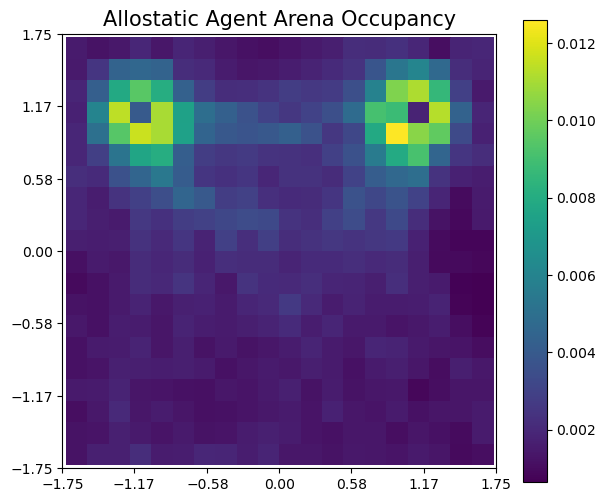

In [186]:
exp_Xpose = np.concatenate(allostatic_Xpose)
exp_Ypose = np.concatenate(allostatic_Ypose)

xy_array = np.column_stack((exp_Xpose, exp_Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 20
xedges = np.linspace(min(exp_Xpose), max(exp_Xpose), bins + 1)
yedges = np.linspace(min(exp_Ypose), max(exp_Ypose), bins + 1)


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
H = hist.T
H_normalized = H/float(xy_array.shape[0])

        
ax.set_title("Allostatic Agent Arena Occupancy", fontsize=15)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
#cbar.set_label('Normal timesteps', rotation=270, fontsize=15, labelpad=+25)

plt.savefig("Plots/allostatic_occupancy.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/allostatic_occupancy.png", format='png', bbox_inches='tight')

plt.show()

### AllostaticSec agent occupancy map

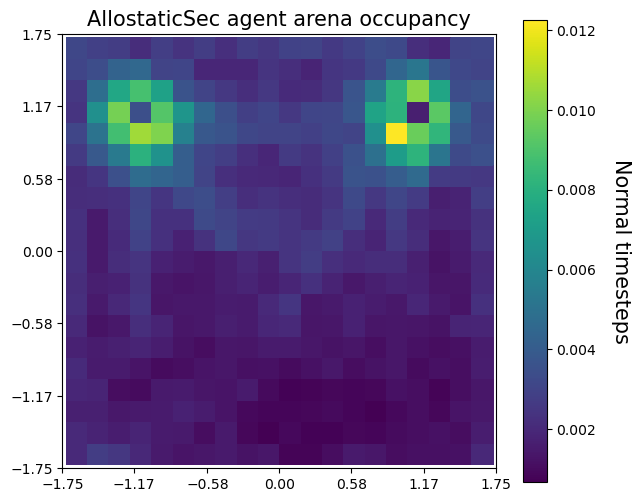

In [17]:
exp_Xpose = np.concatenate(allostaticSec_Xpose)
exp_Ypose = np.concatenate(allostaticSec_Ypose)

xy_array = np.column_stack((exp_Xpose, exp_Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 20
xedges = np.linspace(min(exp_Xpose), max(exp_Xpose), bins + 1)
yedges = np.linspace(min(exp_Ypose), max(exp_Ypose), bins + 1)


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
H = hist.T
H_normalized = H/float(xy_array.shape[0])

        
ax.set_title("AllostaticSec Agent Arena Occupancy", fontsize=15)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
cbar.set_label('Normal timesteps', rotation=270, fontsize=15, labelpad=+25)

plt.show()

### Internal state analysis

In this analysis we take the mean internal state for each need and each session.

In [18]:
control_means_IS_temperature = []
control_means_IS_hydration = []
control_means_IS_energy = []
control_means_IS_security = []
control_means_IS_mating = []
for i in range(control_n_experiments):
    control_means_IS_temperature.append(np.mean(control_IS_temperature[i]))
    control_means_IS_hydration.append(np.mean(control_IS_hydration[i]))
    control_means_IS_energy.append(np.mean(control_IS_energy[i]))
    control_means_IS_security.append(np.mean(control_IS_security[i]))
    control_means_IS_mating.append(np.mean(control_IS_mating[i]))

In [19]:
allostatic_means_IS_temperature = []
allostatic_means_IS_hydration = []
allostatic_means_IS_energy = []
allostatic_means_IS_security = []
allostatic_means_IS_mating = []
for i in range(allostatic_n_experiments):
    allostatic_means_IS_temperature.append(np.mean(allostatic_IS_temperature[i]))
    allostatic_means_IS_hydration.append(np.mean(allostatic_IS_hydration[i]))
    allostatic_means_IS_energy.append(np.mean(allostatic_IS_energy[i]))
    allostatic_means_IS_security.append(np.mean(allostatic_IS_security[i]))
    allostatic_means_IS_mating.append(np.mean(allostatic_IS_mating[i]))

In [20]:
allostaticSec_means_IS_temperature = []
allostaticSec_means_IS_hydration = []
allostaticSec_means_IS_energy = []
allostaticSec_means_IS_security = []
allostaticSec_means_IS_mating = []
for i in range(allostaticSec_n_experiments):
    allostaticSec_means_IS_temperature.append(np.mean(allostaticSec_IS_temperature[i]))
    allostaticSec_means_IS_hydration.append(np.mean(allostaticSec_IS_hydration[i]))
    allostaticSec_means_IS_energy.append(np.mean(allostaticSec_IS_energy[i]))
    allostaticSec_means_IS_security.append(np.mean(allostaticSec_IS_security[i]))
    allostaticSec_means_IS_mating.append(np.mean(allostaticSec_IS_mating[i]))

In [21]:
control_mean_ISs = [np.mean(control_means_IS_temperature), np.mean(control_means_IS_hydration), np.mean(control_means_IS_energy), np.mean(control_means_IS_security), np.mean(control_means_IS_mating)]
allostatic_mean_ISs = [np.mean(allostatic_means_IS_temperature), np.mean(allostatic_means_IS_hydration), np.mean(allostatic_means_IS_energy), np.mean(allostatic_means_IS_security), np.mean(allostatic_means_IS_mating)]
allostaticSec_mean_ISs = [np.mean(allostaticSec_means_IS_temperature), np.mean(allostaticSec_means_IS_hydration), np.mean(allostaticSec_means_IS_energy), np.mean(allostaticSec_means_IS_security), np.mean(allostaticSec_means_IS_mating)]

control_std_ISs = [np.std(control_means_IS_temperature), np.std(control_means_IS_hydration), np.std(control_means_IS_energy), np.std(control_means_IS_security), np.std(control_means_IS_mating)]
allostatic_std_ISs = [np.std(allostatic_means_IS_temperature), np.std(allostatic_means_IS_hydration), np.std(allostatic_means_IS_energy), np.std(allostatic_means_IS_security), np.std(allostatic_means_IS_mating)]
allostaticSec_std_ISs = [np.std(allostaticSec_means_IS_temperature), np.std(allostaticSec_means_IS_hydration), np.std(allostaticSec_means_IS_energy), np.std(allostaticSec_means_IS_security), np.std(allostaticSec_means_IS_mating)]

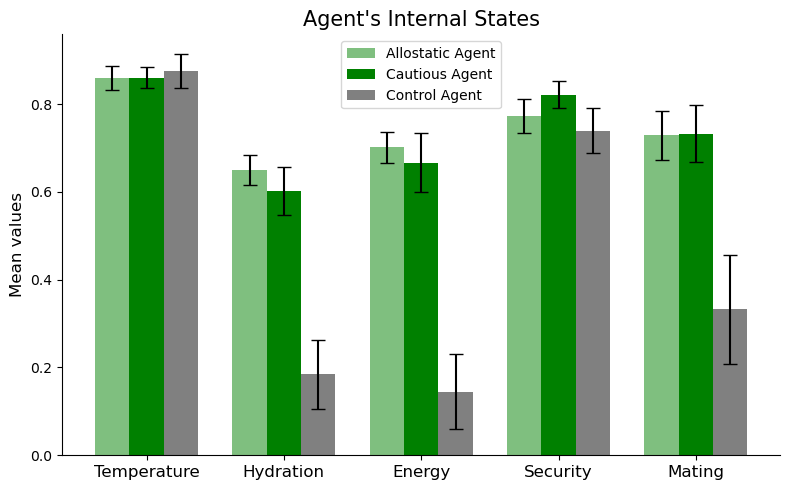

In [230]:
labels = ['Temperature', 'Hydration', 'Energy', 'Security', 'Mating']  # x-axis labels

x = np.arange(len(labels))  # positions for labels
width = 0.25  # width of each bar

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width, allostatic_mean_ISs, width, label='Allostatic Agent', color='green', alpha=0.5, yerr=allostatic_std_ISs, capsize=5)
bars2 = ax.bar(x, allostaticSec_mean_ISs, width, label='Cautious Agent', color='green', yerr=allostaticSec_std_ISs, capsize=5)
bars3 = ax.bar(x + width, control_mean_ISs, width, label='Control Agent', color='gray', yerr=control_std_ISs, capsize=5)


# Add labels and title
ax.set_ylabel('Mean values', fontsize=12)
ax.set_title("Agent's Internal States", fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig("Plots/InternalStates.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/InternalStates.png", format='png', bbox_inches='tight')
plt.show()

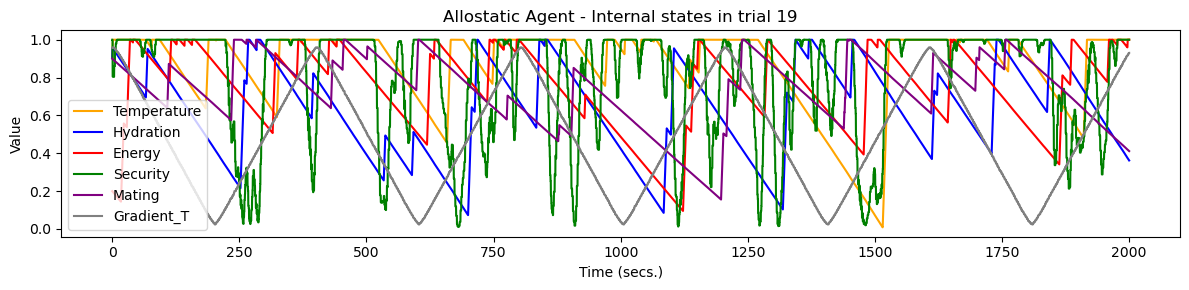

In [23]:
trial = 19
x = allostatic_trial_time[trial]

plt.figure(figsize=(12, 3))
plt.plot(x, allostatic_IS_temperature[trial], label='Temperature', color= 'Orange')
plt.plot(x, allostatic_IS_hydration[trial], label='Hydration', color= 'Blue')
plt.plot(x, allostatic_IS_energy[trial], label='Energy', color= 'Red')
plt.plot(x, allostatic_IS_security[trial], label='Security', color= 'Green')
plt.plot(x, allostatic_IS_mating[trial], label='Mating', color= 'Purple')
plt.plot(x, allostatic_gradient_temp[trial], label='Gradient_T', color= 'Gray')

# Labels and legend
plt.xlabel('Time (secs.)')
plt.ylabel('Value')
plt.title('Allostatic Agent - Internal states in trial ' + str(trial))
plt.legend()
plt.tight_layout()
plt.show()

### Exploring correlations between internal states and environmental temperature
#### Within trials

In [24]:
max_gradient_temp = np.max(allostatic_gradient_temp[0])
min_gradient_temp = np.min(allostatic_gradient_temp[0])
n_clusters = int(round((max_gradient_temp - min_gradient_temp), 2) *100)

cluster_thresholds = [] 
low_treshold = min_gradient_temp

for i in range(n_clusters):
    low_treshold += 0.01
    cluster_thresholds.append(low_treshold)

cluster_thresholds = [0] + cluster_thresholds

In [25]:
control_temperature_trial_cluster = []
control_energy_trial_cluster = []
control_hydration_trial_cluster = []
control_security_trial_cluster = []
control_mating_trial_cluster = []

for exp in range(len(control_IS_temperature)): # Find mean ISs for each cluster in each experiment
    temperature_trial_cluster_exp = []
    energy_trial_cluster_exp = []
    hydration_trial_cluster_exp = []
    security_trial_cluster_exp = []
    mating_trial_cluster_exp = []

    for i in range(n_clusters):
        temperature_cluster = []
        energy_cluster = []
        hydration_cluster = []
        security_cluster = []
        mating_cluster = []
        for j in range(len(control_IS_temperature[exp])):
            if control_gradient_temp[exp][j] >= cluster_thresholds[i] and control_gradient_temp[exp][j] < cluster_thresholds[i+1]:
                temperature_cluster.append(control_IS_temperature[exp][j])
                energy_cluster.append(control_IS_energy[exp][j])
                hydration_cluster.append(control_IS_hydration[exp][j])
                security_cluster.append(control_IS_security[exp][j])
                mating_cluster.append(control_IS_mating[exp][j])
                
        temperature_trial_cluster_exp.append(np.mean(temperature_cluster))
        energy_trial_cluster_exp.append(np.mean(energy_cluster))
        hydration_trial_cluster_exp.append(np.mean(hydration_cluster))
        security_trial_cluster_exp.append(np.mean(security_cluster))
        mating_trial_cluster_exp.append(np.mean(mating_cluster))
        
    control_temperature_trial_cluster.append(temperature_trial_cluster_exp)
    control_energy_trial_cluster.append(energy_trial_cluster_exp)
    control_hydration_trial_cluster.append(hydration_trial_cluster_exp)
    control_security_trial_cluster.append(security_trial_cluster_exp)
    control_mating_trial_cluster.append(mating_trial_cluster_exp)

In [26]:
allostatic_temperature_trial_cluster = []
allostatic_energy_trial_cluster = []
allostatic_hydration_trial_cluster = []
allostatic_security_trial_cluster = []
allostatic_mating_trial_cluster = []

for exp in range(len(allostatic_IS_temperature)): # Find mean ISs for each cluster in each experiment
    temperature_trial_cluster_exp = []
    energy_trial_cluster_exp = []
    hydration_trial_cluster_exp = []
    security_trial_cluster_exp = []
    mating_trial_cluster_exp = []

    for i in range(n_clusters):
        temperature_cluster = []
        energy_cluster = []
        hydration_cluster = []
        security_cluster = []
        mating_cluster = []
        for j in range(len(allostatic_IS_temperature[exp])):
            if allostatic_gradient_temp[exp][j] >= cluster_thresholds[i] and allostatic_gradient_temp[exp][j] < cluster_thresholds[i+1]:
                temperature_cluster.append(allostatic_IS_temperature[exp][j])
                energy_cluster.append(allostatic_IS_energy[exp][j])
                hydration_cluster.append(allostatic_IS_hydration[exp][j])
                security_cluster.append(allostatic_IS_security[exp][j])
                mating_cluster.append(allostatic_IS_mating[exp][j])
                
        temperature_trial_cluster_exp.append(np.mean(temperature_cluster))
        energy_trial_cluster_exp.append(np.mean(energy_cluster))
        hydration_trial_cluster_exp.append(np.mean(hydration_cluster))
        security_trial_cluster_exp.append(np.mean(security_cluster))
        mating_trial_cluster_exp.append(np.mean(mating_cluster))
        
    allostatic_temperature_trial_cluster.append(temperature_trial_cluster_exp)
    allostatic_energy_trial_cluster.append(energy_trial_cluster_exp)
    allostatic_hydration_trial_cluster.append(hydration_trial_cluster_exp)
    allostatic_security_trial_cluster.append(security_trial_cluster_exp)
    allostatic_mating_trial_cluster.append(mating_trial_cluster_exp)

In [27]:
allostatic_temperature_trial_cluster = list(np.concatenate(allostatic_temperature_trial_cluster))
allostatic_energy_trial_cluster = list(np.concatenate(allostatic_energy_trial_cluster))
allostatic_hydration_trial_cluster = list(np.concatenate(allostatic_hydration_trial_cluster))
allostatic_security_trial_cluster = list(np.concatenate(allostatic_security_trial_cluster))
allostatic_mating_trial_cluster = list(np.concatenate(allostatic_mating_trial_cluster))

control_temperature_trial_cluster = list(np.concatenate(control_temperature_trial_cluster))
control_energy_trial_cluster = list(np.concatenate(control_energy_trial_cluster))
control_hydration_trial_cluster = list(np.concatenate(control_hydration_trial_cluster))
control_security_trial_cluster = list(np.concatenate(control_security_trial_cluster))
control_mating_trial_cluster = list(np.concatenate(control_mating_trial_cluster))

In [28]:
def plot_within_trial_correlation(allostatic_mean_cluster, control_mean_cluster, cluster_thresholds, internal_state, color):
    x0 = allostatic_mean_cluster
    x1 = control_mean_cluster
    y = cluster_thresholds[:-1] *20
    
    plt.figure(figsize=(5, 4))
    plt.scatter(x0, y, color=color, label='Allostatic Agent', alpha=0.2)
    plt.scatter(x1, y, color='gray', label='Control Agent', alpha=0.2)
    
    r0, p0 = pearsonr(x0, y)
    slope0, intercept0, *_ = linregress(x0, y)
    line0 = slope0 * np.array(x0) + intercept0
    
    r1, p1 = pearsonr(x1, y)
    slope1, intercept1, *_ = linregress(x1, y)
    line1 = slope1 * np.array(x1) + intercept1
    
    plt.plot(x1, line1, color='gray', linestyle='-', label=f'Fit (r = {r1:.3f})')
    plt.plot(x0, line0, color=color, linestyle='-', label=f'Fit (r = {r0:.3f})')
    
    plt.xlabel('Agent ' + internal_state)
    plt.ylabel('Env. Temperature')
    plt.ylim(0, 1)
    plt.title('Agent ' + internal_state + ' vs. Env. Temperature', fontsize=15)
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

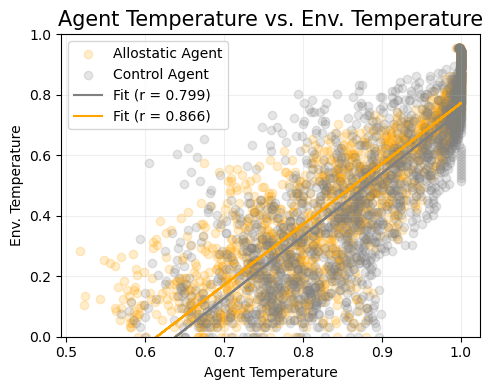

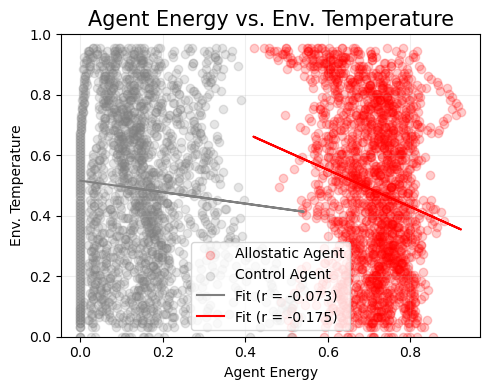

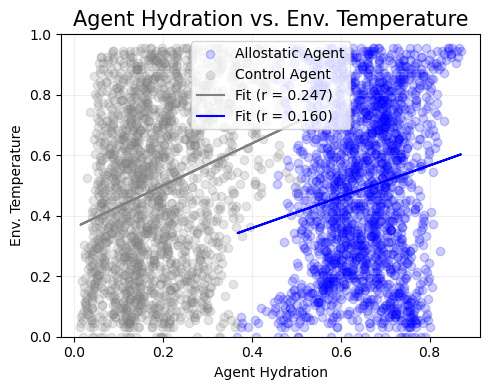

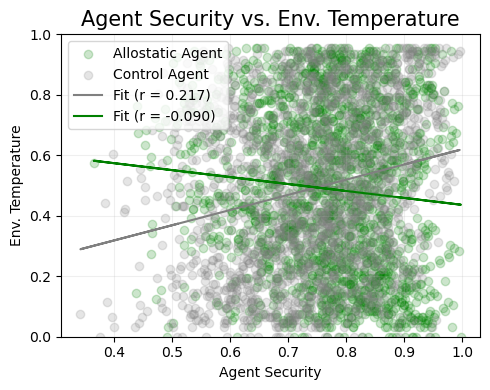

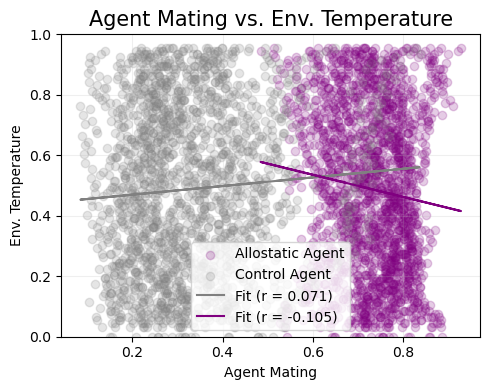

In [29]:
plot_within_trial_correlation(allostatic_temperature_trial_cluster, control_temperature_trial_cluster, cluster_thresholds, 'Temperature', 'orange')
plot_within_trial_correlation(allostatic_energy_trial_cluster, control_energy_trial_cluster, cluster_thresholds, 'Energy', 'red')
plot_within_trial_correlation(allostatic_hydration_trial_cluster, control_hydration_trial_cluster, cluster_thresholds, 'Hydration', 'blue')
plot_within_trial_correlation(allostatic_security_trial_cluster, control_security_trial_cluster, cluster_thresholds, 'Security', 'green')
plot_within_trial_correlation(allostatic_mating_trial_cluster, control_mating_trial_cluster, cluster_thresholds, 'Mating', 'purple')

In [30]:
allostatic_trial_efficiency = []
for i in range(len(allostatic_temperature_trial_cluster)):
    allostatic_trial_efficiency.append((allostatic_temperature_trial_cluster[i] + allostatic_energy_trial_cluster[i] + allostatic_hydration_trial_cluster[i] + allostatic_security_trial_cluster[i] + allostatic_mating_trial_cluster[i]) / 5)

allostatic_trial_fairness = []
for i in range(len(allostatic_temperature_trial_cluster)):
    max_IS = max([allostatic_temperature_trial_cluster[i], allostatic_energy_trial_cluster[i], allostatic_hydration_trial_cluster[i], allostatic_security_trial_cluster[i], allostatic_mating_trial_cluster[i]])
    min_IS = min([allostatic_temperature_trial_cluster[i], allostatic_energy_trial_cluster[i], allostatic_hydration_trial_cluster[i], allostatic_security_trial_cluster[i], allostatic_mating_trial_cluster[i]])
    allostatic_trial_fairness.append(1 - (max_IS - min_IS))

allostatic_trial_stability = []
dV = 1.0
for i in range(len(allostatic_temperature_trial_cluster)):
    full_state = [allostatic_temperature_trial_cluster[i], allostatic_energy_trial_cluster[i], allostatic_hydration_trial_cluster[i], allostatic_security_trial_cluster[i], allostatic_mating_trial_cluster[i]]
    squared_errors = (np.array(full_state) - dV) ** 2
    total_squared_error = np.sum(squared_errors)
    stability = 1 - (total_squared_error / 5)
    allostatic_trial_stability.append(stability)

In [31]:
control_trial_efficiency = []
for i in range(len(control_temperature_trial_cluster)):
    control_trial_efficiency.append((control_temperature_trial_cluster[i] + control_energy_trial_cluster[i] + control_hydration_trial_cluster[i] + control_security_trial_cluster[i] + control_mating_trial_cluster[i]) / 5)

control_trial_fairness = []
for i in range(len(control_temperature_trial_cluster)):
    max_IS = max([control_temperature_trial_cluster[i], control_energy_trial_cluster[i], control_hydration_trial_cluster[i], control_security_trial_cluster[i], control_mating_trial_cluster[i]])
    min_IS = min([control_temperature_trial_cluster[i], control_energy_trial_cluster[i], control_hydration_trial_cluster[i], control_security_trial_cluster[i], control_mating_trial_cluster[i]])
    control_trial_fairness.append(1 - (max_IS - min_IS))

control_trial_stability = []
dV = 1.0
for i in range(len(control_temperature_trial_cluster)):
    full_state = [control_temperature_trial_cluster[i], control_energy_trial_cluster[i], control_hydration_trial_cluster[i], control_security_trial_cluster[i], control_mating_trial_cluster[i]]
    squared_errors = (np.array(full_state) - dV) ** 2
    total_squared_error = np.sum(squared_errors)
    stability = 1 - (total_squared_error / 5)
    control_trial_stability.append(stability)

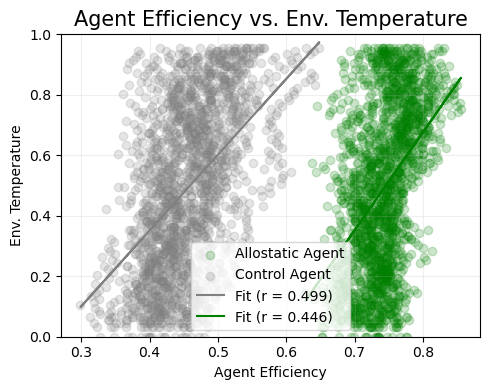

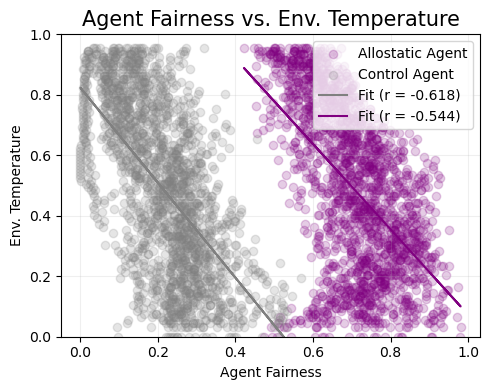

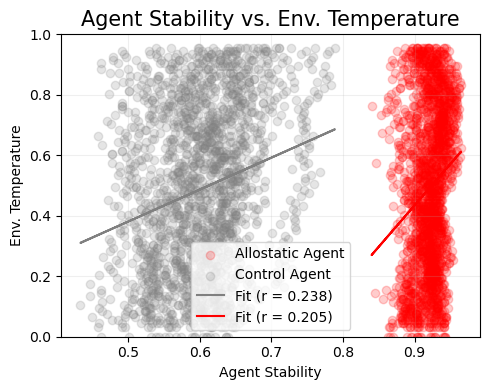

In [32]:
plot_within_trial_correlation(allostatic_trial_efficiency, control_trial_efficiency, cluster_thresholds, 'Efficiency', 'green')
plot_within_trial_correlation(allostatic_trial_fairness, control_trial_fairness, cluster_thresholds, 'Fairness', 'purple')
plot_within_trial_correlation(allostatic_trial_stability, control_trial_stability, cluster_thresholds, 'Stability', 'red')

### Alternative Efficiency, Fairness and Stability analysis

In [96]:
period = 100

allostatic_exp_efficiency = []
allostatic_exp_fairness = []
allostatic_exp_stability = []
allostatic_exp_env_temp = []

for exp in range(len(allostatic_IS_temperature)):
    trial = exp
    trial_efficiency = []
    trial_fairness = []
    trial_stability = []
    trial_env_temp = []
    
    for i in range(int(len(allostatic_IS_temperature[trial])/period)):
        period_temperature = np.mean(allostatic_IS_temperature[trial][i*period:(i+1)*period])
        period_hydration = np.mean(allostatic_IS_hydration[trial][i*period:(i+1)*period])
        period_energy = np.mean(allostatic_IS_energy[trial][i*period:(i+1)*period])
        period_security = np.mean(allostatic_IS_security[trial][i*period:(i+1)*period])
        period_mating = np.mean(allostatic_IS_mating[trial][i*period:(i+1)*period])
    
        trial_env_temp.append(np.mean(allostatic_gradient_temp[trial][i*period:(i+1)*period]))
        min_IS = min(period_temperature, period_hydration, period_energy, period_security, period_mating)
        max_IS = max(period_temperature, period_hydration, period_energy, period_security, period_mating)
        
        trial_efficiency.append((period_temperature + period_hydration + period_energy + period_security + period_mating)/5)
        trial_fairness.append(1 - (max_IS - min_IS))

        full_state = [period_temperature, period_hydration, period_energy, period_security, period_mating]
        squared_error = (np.array(full_state) - dV) ** 2
        total_squared_error = np.sum(squared_error)
        trial_stability.append(1 - (total_squared_error / 5))

    allostatic_exp_efficiency.append(trial_efficiency)
    allostatic_exp_fairness.append(trial_fairness)
    allostatic_exp_stability.append(trial_stability)
    allostatic_exp_env_temp.append(trial_env_temp)

In [97]:
control_exp_efficiency = []
control_exp_fairness = []
control_exp_stability = []
control_exp_env_temp = []

for exp in range(len(control_IS_temperature)):
    trial = exp
    trial_efficiency = []
    trial_fairness = []
    trial_stability = []
    trial_env_temp = []
    
    for i in range(int(len(control_IS_temperature[trial])/period)):
        period_temperature = np.mean(control_IS_temperature[trial][i*period:(i+1)*period])
        period_hydration = np.mean(control_IS_hydration[trial][i*period:(i+1)*period])
        period_energy = np.mean(control_IS_energy[trial][i*period:(i+1)*period])
        period_security = np.mean(control_IS_security[trial][i*period:(i+1)*period])
        period_mating = np.mean(control_IS_mating[trial][i*period:(i+1)*period])
    
        trial_env_temp.append(np.mean(control_gradient_temp[trial][i*period:(i+1)*period]))
        min_IS = min(period_temperature, period_hydration, period_energy, period_security, period_mating)
        max_IS = max(period_temperature, period_hydration, period_energy, period_security, period_mating)
        
        trial_efficiency.append((period_temperature + period_hydration + period_energy + period_security + period_mating)/5)
        trial_fairness.append(1 - (max_IS - min_IS))

        full_state = [period_temperature, period_hydration, period_energy, period_security, period_mating]
        squared_error = (np.array(full_state) - dV) ** 2
        total_squared_error = np.sum(squared_error)
        trial_stability.append(1 - (total_squared_error / 5))

    control_exp_efficiency.append(trial_efficiency)
    control_exp_fairness.append(trial_fairness)
    control_exp_stability.append(trial_stability)
    control_exp_env_temp.append(trial_env_temp)

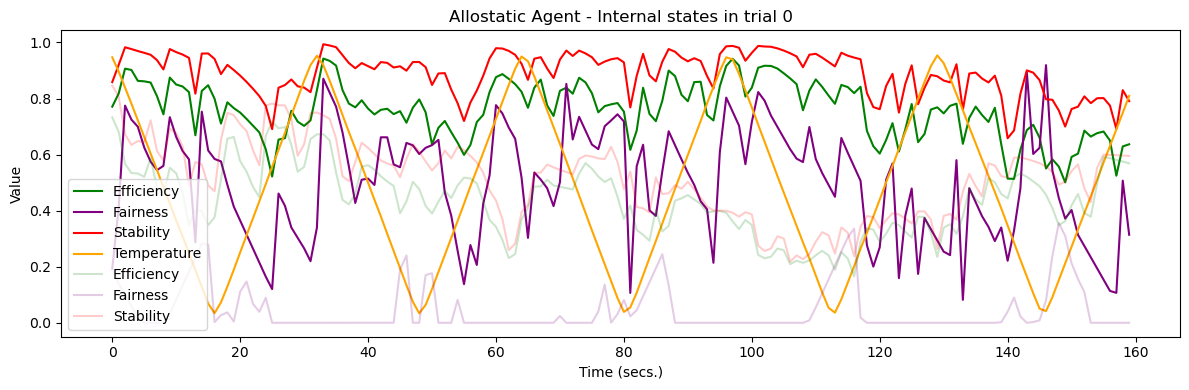

In [101]:
trial = 0
min_len = min(len(allostatic_exp_efficiency[trial]), len(control_exp_efficiency[trial]))
trial_efficiency = allostatic_exp_efficiency[trial][:min_len]
trial_fairness = allostatic_exp_fairness[trial][:min_len]
trial_stability = allostatic_exp_stability[trial][:min_len]
trial_env_temp = allostatic_exp_env_temp[trial][:min_len]

control_trial_efficiency = control_exp_efficiency[trial][:min_len]
control_trial_fairness = control_exp_fairness[trial][:min_len]
control_trial_stability = control_exp_stability[trial][:min_len]


x = np.arange(len(trial_env_temp))

plt.figure(figsize=(12, 4))
plt.plot(x, trial_efficiency, label='Efficiency', color= 'Green')
plt.plot(x, trial_fairness, label='Fairness', color= 'purple')
plt.plot(x, trial_stability, label='Stability', color= 'red')
plt.plot(x, trial_env_temp, label='Temperature', color= 'orange')

plt.plot(x, control_trial_efficiency, label='Efficiency', color= 'Green', alpha=0.2)
plt.plot(x, control_trial_fairness, label='Fairness', color= 'purple', alpha=0.2)
plt.plot(x, control_trial_stability, label='Stability', color= 'red', alpha=0.2)

'''plt.plot(x, trial_temperature, label='Temperature', color= 'orange', alpha=0.3)
plt.plot(x, trial_hydration, label='Hydration', color= 'blue', alpha=0.3)
plt.plot(x, trial_energy, label='Energy', color= 'red', alpha=0.3)
plt.plot(x, trial_security, label='Security', color= 'green', alpha=0.3)
plt.plot(x, trial_mating, label='Mating', color= 'purple', alpha=0.3)'''

# Labels and legend
plt.xlabel('Time (secs.)')
plt.ylabel('Value')
plt.title('Allostatic Agent - Internal states in trial ' + str(trial))
plt.legend()
plt.tight_layout()
plt.show()

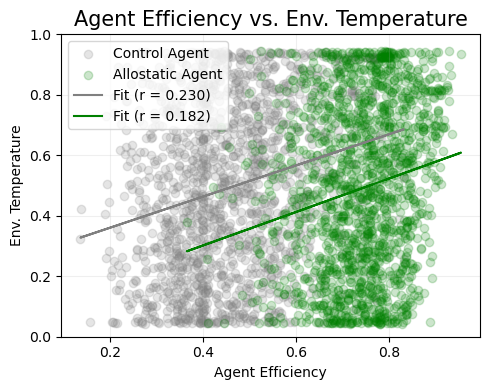

In [91]:
x0 = np.concatenate(control_exp_efficiency)
y0 = np.concatenate(control_exp_env_temp)

x1 = np.concatenate(allostatic_exp_efficiency)
y1 = np.concatenate(allostatic_exp_env_temp)

plt.figure(figsize=(5, 4))
plt.scatter(x0, y0, color='gray', label='Control Agent', alpha=0.2)
plt.scatter(x1, y1, color='green', label='Allostatic Agent', alpha=0.2)

r0, p0 = pearsonr(x0, y0)
slope0, intercept0, *_ = linregress(x0, y0)
line0 = slope0 * np.array(x0) + intercept0

r1, p1 = pearsonr(x1, y1)
slope1, intercept1, *_ = linregress(x1, y1)
line1 = slope1 * np.array(x1) + intercept1

plt.plot(x0, line0, color='gray', linestyle='-', label=f'Fit (r = {r0:.3f})')
plt.plot(x1, line1, color='green', linestyle='-', label=f'Fit (r = {r1:.3f})')

plt.xlabel('Agent Efficiency')
plt.ylabel('Env. Temperature')
plt.ylim(0, 1)
plt.title('Agent Efficiency vs. Env. Temperature', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

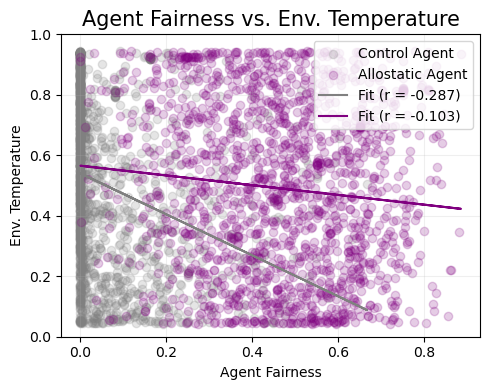

In [93]:
x0 = np.concatenate(control_exp_fairness)
y0 = np.concatenate(control_exp_env_temp)

x1 = np.concatenate(allostatic_exp_fairness)
y1 = np.concatenate(allostatic_exp_env_temp)

plt.figure(figsize=(5, 4))
plt.scatter(x0, y0, color='gray', label='Control Agent', alpha=0.2)
plt.scatter(x1, y1, color='purple', label='Allostatic Agent', alpha=0.2)

r0, p0 = pearsonr(x0, y0)
slope0, intercept0, *_ = linregress(x0, y0)
line0 = slope0 * np.array(x0) + intercept0

r1, p1 = pearsonr(x1, y1)
slope1, intercept1, *_ = linregress(x1, y1)
line1 = slope1 * np.array(x1) + intercept1

plt.plot(x0, line0, color='gray', linestyle='-', label=f'Fit (r = {r0:.3f})')
plt.plot(x1, line1, color='purple', linestyle='-', label=f'Fit (r = {r1:.3f})')

plt.xlabel('Agent Fairness')
plt.ylabel('Env. Temperature')
plt.ylim(0, 1)
plt.title('Agent Fairness vs. Env. Temperature', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

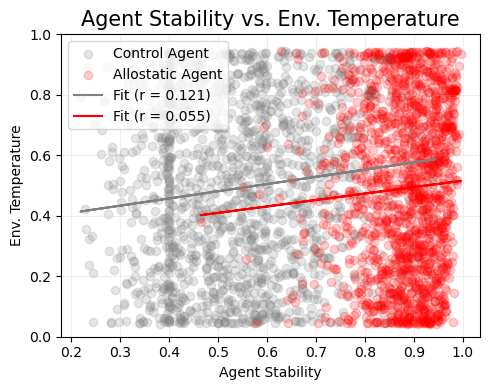

In [94]:
x0 = np.concatenate(control_exp_stability)
y0 = np.concatenate(control_exp_env_temp)

x1 = np.concatenate(allostatic_exp_stability)
y1 = np.concatenate(allostatic_exp_env_temp)

plt.figure(figsize=(5, 4))
plt.scatter(x0, y0, color='gray', label='Control Agent', alpha=0.2)
plt.scatter(x1, y1, color='red', label='Allostatic Agent', alpha=0.2)

r0, p0 = pearsonr(x0, y0)
slope0, intercept0, *_ = linregress(x0, y0)
line0 = slope0 * np.array(x0) + intercept0

r1, p1 = pearsonr(x1, y1)
slope1, intercept1, *_ = linregress(x1, y1)
line1 = slope1 * np.array(x1) + intercept1

plt.plot(x0, line0, color='gray', linestyle='-', label=f'Fit (r = {r0:.3f})')
plt.plot(x1, line1, color='red', linestyle='-', label=f'Fit (r = {r1:.3f})')

plt.xlabel('Agent Stability')
plt.ylabel('Env. Temperature')
plt.ylim(0, 1)
plt.title('Agent Stability vs. Env. Temperature', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [161]:
env_temp_thresholds = []
threshold = 0.0
for i in range(101):
    env_temp_thresholds.append(round(threshold,2))
    threshold += 0.01

In [162]:
control_exp_efficiency_clustered = []
control_exp_fairness_clustered = []
control_exp_stability_clustered = []

for cluster in range(len(env_temp_thresholds)):
    cluster_efficiency = []
    cluster_fairness = []
    cluster_stability = []
    for exp in range(len(control_exp_env_temp)):
        for step in range(len(control_exp_env_temp[exp])):
            if control_exp_env_temp[exp][step] >= env_temp_thresholds[cluster] and control_exp_env_temp[exp][step] < env_temp_thresholds[cluster+1]:
                cluster_efficiency.append(control_exp_efficiency[exp][step])
                cluster_fairness.append(control_exp_fairness[exp][step])
                cluster_stability.append(control_exp_stability[exp][step])

    control_exp_efficiency_clustered.append(np.mean(cluster_efficiency))
    control_exp_fairness_clustered.append(np.mean(cluster_fairness))
    control_exp_stability_clustered.append(np.mean(cluster_stability))

In [163]:
allostatic_exp_efficiency_clustered = []
allostatic_exp_fairness_clustered = []
allostatic_exp_stability_clustered = []

for cluster in range(len(env_temp_thresholds)):
    cluster_efficiency = []
    cluster_fairness = []
    cluster_stability = []
    for exp in range(len(allostatic_exp_env_temp)):
        for step in range(len(allostatic_exp_env_temp[exp])):
            if allostatic_exp_env_temp[exp][step] >= env_temp_thresholds[cluster] and allostatic_exp_env_temp[exp][step] < env_temp_thresholds[cluster+1]:
                cluster_efficiency.append(allostatic_exp_efficiency[exp][step])
                cluster_fairness.append(allostatic_exp_fairness[exp][step])
                cluster_stability.append(allostatic_exp_stability[exp][step])

    allostatic_exp_efficiency_clustered.append(np.mean(cluster_efficiency))
    allostatic_exp_fairness_clustered.append(np.mean(cluster_fairness))
    allostatic_exp_stability_clustered.append(np.mean(cluster_stability))

In [164]:
minimum = 1
for i in range(len(allostatic_exp_env_temp)):
    candidate = min(allostatic_exp_env_temp[i])
    if candidate < minimum:
        minimum = candidate

print('Minimum Env. Temp. =', round(minimum, 3))

Minimum Env. Temp. = 0.033


In [165]:
maximum = 0
for i in range(len(allostatic_exp_env_temp)):
    candidate = max(allostatic_exp_env_temp[i])
    if candidate > maximum:
        maximum = candidate

print('Maximum Env. Temp. =', round(maximum, 3))

Maximum Env. Temp. = 0.954


In [166]:
env_temp_thresholds = env_temp_thresholds[3:-5]

control_exp_efficiency_clustered = control_exp_efficiency_clustered[3:-5]
control_exp_fairness_clustered = control_exp_fairness_clustered[3:-5]
control_exp_stability_clustered = control_exp_stability_clustered[3:-5]

allostatic_exp_efficiency_clustered = allostatic_exp_efficiency_clustered[3:-5]
allostatic_exp_fairness_clustered = allostatic_exp_fairness_clustered[3:-5]
allostatic_exp_stability_clustered = allostatic_exp_stability_clustered[3:-5]

In [192]:
np.mean(control_exp_efficiency_clustered)

0.4533178563632381

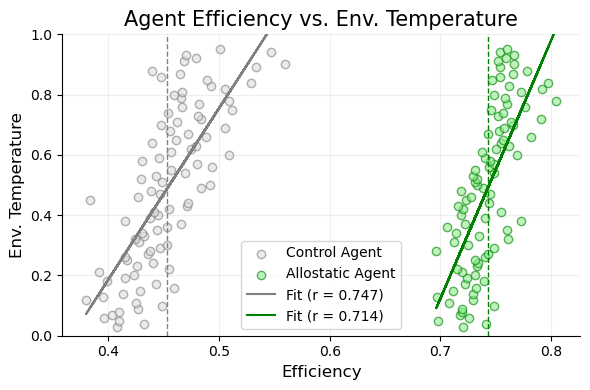

In [206]:
x0 = control_exp_efficiency_clustered
x1 = allostatic_exp_efficiency_clustered
y = env_temp_thresholds

plt.figure(figsize=(6, 4))
plt.scatter(x0, y, color='gainsboro', edgecolors='gray', label='Control Agent', alpha=0.6)
plt.scatter(x1, y, color='lightgreen', edgecolors='green', label='Allostatic Agent', alpha=0.6)

r0, p0 = pearsonr(x0, y)
slope0, intercept0, *_ = linregress(x0, y)
line0 = slope0 * np.array(x0) + intercept0

r1, p1 = pearsonr(x1, y)
slope1, intercept1, *_ = linregress(x1, y)
line1 = slope1 * np.array(x1) + intercept1

plt.plot(x0, line0, color='gray', linestyle='-', label=f'Fit (r = {r0:.3f})')
plt.plot(x1, line1, color='green', linestyle='-', label=f'Fit (r = {r1:.3f})')

plt.plot([np.mean(control_exp_efficiency_clustered), np.mean(control_exp_efficiency_clustered)], [0, 1], color='gray', linestyle='dashed', linewidth=1)
plt.plot([np.mean(allostatic_exp_efficiency_clustered), np.mean(allostatic_exp_efficiency_clustered)], [0, 1], color='green', linestyle='dashed', linewidth=1)

plt.xlabel('Efficiency', fontsize=12)
plt.ylabel('Env. Temperature', fontsize=12)
plt.ylim(0, 1)
plt.title('Agent Efficiency vs. Env. Temperature', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("Plots/Efficiency.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/Efficiency.png", format='png', bbox_inches='tight')
plt.show()

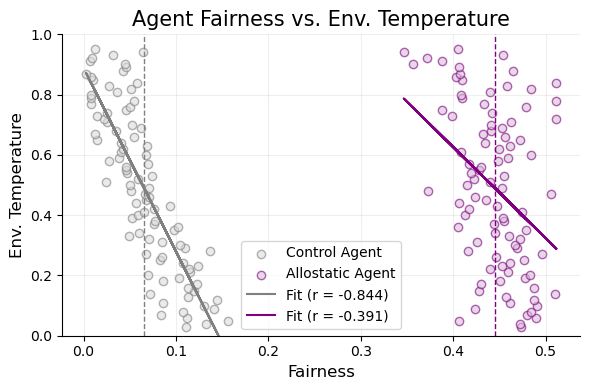

In [215]:
x0 = control_exp_fairness_clustered
x1 = allostatic_exp_fairness_clustered
y = env_temp_thresholds

plt.figure(figsize=(6, 4))
plt.scatter(x0, y, color='gainsboro', edgecolors='gray', label='Control Agent', alpha=0.6)
plt.scatter(x1, y, color='thistle', edgecolors='purple', label='Allostatic Agent', alpha=0.6)

r0, p0 = pearsonr(x0, y)
slope0, intercept0, *_ = linregress(x0, y)
line0 = slope0 * np.array(x0) + intercept0

r1, p1 = pearsonr(x1, y)
slope1, intercept1, *_ = linregress(x1, y)
line1 = slope1 * np.array(x1) + intercept1

plt.plot(x0, line0, color='gray', linestyle='-', label=f'Fit (r = {r0:.3f})')
plt.plot(x1, line1, color='purple', linestyle='-', label=f'Fit (r = {r1:.3f})')

plt.plot([np.mean(control_exp_fairness_clustered), np.mean(control_exp_fairness_clustered)], [0, 1], color='gray', linestyle='dashed', linewidth=1)
plt.plot([np.mean(allostatic_exp_fairness_clustered), np.mean(allostatic_exp_fairness_clustered)], [0, 1], color='purple', linestyle='dashed', linewidth=1)


plt.xlabel('Fairness', fontsize=12)
plt.ylabel('Env. Temperature', fontsize=12)
plt.ylim(0, 1)
plt.title('Agent Fairness vs. Env. Temperature', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("Plots/Fairness.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/Fairness.png", format='png', bbox_inches='tight')
plt.show()

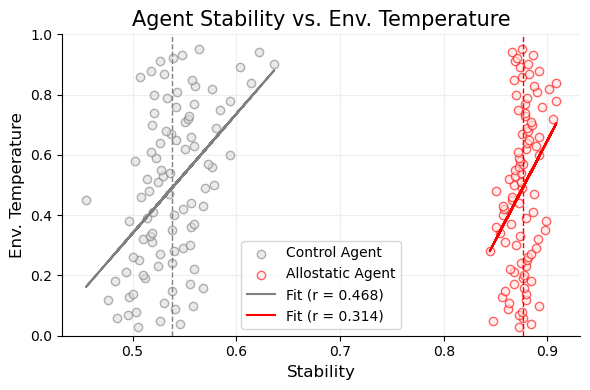

In [216]:
x0 = control_exp_stability_clustered
x1 = allostatic_exp_stability_clustered
y = env_temp_thresholds

plt.figure(figsize=(6, 4))
plt.scatter(x0, y, color='gainsboro', edgecolors='gray', label='Control Agent', alpha=0.6)
plt.scatter(x1, y, color='mistyrose', edgecolors='red', label='Allostatic Agent', alpha=0.6)

r0, p0 = pearsonr(x0, y)
slope0, intercept0, *_ = linregress(x0, y)
line0 = slope0 * np.array(x0) + intercept0

r1, p1 = pearsonr(x1, y)
slope1, intercept1, *_ = linregress(x1, y)
line1 = slope1 * np.array(x1) + intercept1

plt.plot(x0, line0, color='gray', linestyle='-', label=f'Fit (r = {r0:.3f})')
plt.plot(x1, line1, color='red', linestyle='-', label=f'Fit (r = {r1:.3f})')

plt.plot([np.mean(control_exp_stability_clustered), np.mean(control_exp_stability_clustered)], [0, 1], color='gray', linestyle='dashed', linewidth=1)
plt.plot([np.mean(allostatic_exp_stability_clustered), np.mean(allostatic_exp_stability_clustered)], [0, 1], color='red', linestyle='dashed', linewidth=1)


plt.xlabel('Stability', fontsize = 12)
plt.ylabel('Env. Temperature', fontsize = 12)
plt.ylim(0, 1)
plt.title('Agent Stability vs. Env. Temperature', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("Plots/Stability.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/Stability.png", format='png', bbox_inches='tight')
plt.show()

### Risk Analysis

In [218]:
# Proportion of the trial where the agent was in a risk state for each Internal need

risk_threshold = .10

control_risk_timesteps_temperature = []
control_risk_timesteps_energy = []
control_risk_timesteps_hydration = []
control_risk_timesteps_security = []
control_risk_timesteps_mating = []
control_trials_length = []

for i in range(control_n_experiments):
    risk_timesteps_temperature = 0
    risk_timesteps_energy = 0
    risk_timesteps_hydration = 0
    risk_timesteps_security = 0
    risk_timesteps_mating = 0
    control_trials_length.append(len(control_IS_security[i]))
    
    for j in range(len(control_IS_security[i])):
        if control_IS_temperature[i][j] < risk_threshold:
            risk_timesteps_temperature += 1
        if control_IS_energy[i][j] < risk_threshold:
            risk_timesteps_energy += 1
        if control_IS_hydration[i][j] < risk_threshold:
            risk_timesteps_hydration += 1
        if control_IS_security[i][j] < risk_threshold:
            risk_timesteps_security += 1
        if control_IS_mating[i][j] < risk_threshold:
            risk_timesteps_mating += 1
    
    control_risk_timesteps_temperature.append(risk_timesteps_temperature)
    control_risk_timesteps_energy.append(risk_timesteps_energy)
    control_risk_timesteps_hydration.append(risk_timesteps_hydration)
    control_risk_timesteps_security.append(risk_timesteps_security)
    control_risk_timesteps_mating.append(risk_timesteps_mating)

In [219]:
allostatic_risk_timesteps_temperature = []
allostatic_risk_timesteps_energy = []
allostatic_risk_timesteps_hydration = []
allostatic_risk_timesteps_security = []
allostatic_risk_timesteps_mating = []
allostatic_trials_length = []

for i in range(allostatic_n_experiments):
    risk_timesteps_temperature = 0
    risk_timesteps_energy = 0
    risk_timesteps_hydration = 0
    risk_timesteps_security = 0
    risk_timesteps_mating = 0
    allostatic_trials_length.append(len(allostatic_IS_security[i]))
    
    for j in range(len(allostatic_IS_security[i])):
        if allostatic_IS_temperature[i][j] < risk_threshold:
            risk_timesteps_temperature += 1
        if allostatic_IS_energy[i][j] < risk_threshold:
            risk_timesteps_energy += 1
        if allostatic_IS_hydration[i][j] < risk_threshold:
            risk_timesteps_hydration += 1
        if allostatic_IS_security[i][j] < risk_threshold:
            risk_timesteps_security += 1
        if allostatic_IS_mating[i][j] < risk_threshold:
            risk_timesteps_mating += 1
    
    allostatic_risk_timesteps_temperature.append(risk_timesteps_temperature)
    allostatic_risk_timesteps_energy.append(risk_timesteps_energy)
    allostatic_risk_timesteps_hydration.append(risk_timesteps_hydration)
    allostatic_risk_timesteps_security.append(risk_timesteps_security)
    allostatic_risk_timesteps_mating.append(risk_timesteps_mating)

In [220]:
allostaticSec_risk_timesteps_temperature = []
allostaticSec_risk_timesteps_energy = []
allostaticSec_risk_timesteps_hydration = []
allostaticSec_risk_timesteps_security = []
allostaticSec_risk_timesteps_mating = []
allostaticSec_trials_length = []

for i in range(allostaticSec_n_experiments):
    risk_timesteps_temperature = 0
    risk_timesteps_energy = 0
    risk_timesteps_hydration = 0
    risk_timesteps_security = 0
    risk_timesteps_mating = 0
    allostaticSec_trials_length.append(len(allostaticSec_IS_security[i]))
    
    for j in range(len(allostaticSec_IS_security[i])):
        if allostaticSec_IS_temperature[i][j] < risk_threshold:
            risk_timesteps_temperature += 1
        if allostaticSec_IS_energy[i][j] < risk_threshold:
            risk_timesteps_energy += 1
        if allostaticSec_IS_hydration[i][j] < risk_threshold:
            risk_timesteps_hydration += 1
        if allostaticSec_IS_security[i][j] < risk_threshold:
            risk_timesteps_security += 1
        if allostaticSec_IS_mating[i][j] < risk_threshold:
            risk_timesteps_mating += 1
    
    allostaticSec_risk_timesteps_temperature.append(risk_timesteps_temperature)
    allostaticSec_risk_timesteps_energy.append(risk_timesteps_energy)
    allostaticSec_risk_timesteps_hydration.append(risk_timesteps_hydration)
    allostaticSec_risk_timesteps_security.append(risk_timesteps_security)
    allostaticSec_risk_timesteps_mating.append(risk_timesteps_mating)

In [221]:
control_risk_percents_temperature = [a / b*100 for a, b in zip(control_risk_timesteps_temperature, control_trials_length)]
control_risk_percents_energy = [a / b*100 for a, b in zip(control_risk_timesteps_energy, control_trials_length)]
control_risk_percents_hydration = [a / b*100 for a, b in zip(control_risk_timesteps_hydration, control_trials_length)]
control_risk_percents_security = [a / b*100 for a, b in zip(control_risk_timesteps_security, control_trials_length)]
control_risk_percents_mating = [a / b*100 for a, b in zip(control_risk_timesteps_mating, control_trials_length)]

allostatic_risk_percents_temperature = [a / b*100 for a, b in zip(allostatic_risk_timesteps_temperature, allostatic_trials_length)]
allostatic_risk_percents_energy = [a / b*100 for a, b in zip(allostatic_risk_timesteps_energy, allostatic_trials_length)]
allostatic_risk_percents_hydration = [a / b*100 for a, b in zip(allostatic_risk_timesteps_hydration, allostatic_trials_length)]
allostatic_risk_percents_security = [a / b*100 for a, b in zip(allostatic_risk_timesteps_security, allostatic_trials_length)]
allostatic_risk_percents_mating = [a / b*100 for a, b in zip(allostatic_risk_timesteps_mating, allostatic_trials_length)]

allostaticSec_risk_percents_temperature = [a / b*100 for a, b in zip(allostaticSec_risk_timesteps_temperature, allostaticSec_trials_length)]
allostaticSec_risk_percents_energy = [a / b*100 for a, b in zip(allostaticSec_risk_timesteps_energy, allostaticSec_trials_length)]
allostaticSec_risk_percents_hydration = [a / b*100 for a, b in zip(allostaticSec_risk_timesteps_hydration, allostaticSec_trials_length)]
allostaticSec_risk_percents_security = [a / b*100 for a, b in zip(allostaticSec_risk_timesteps_security, allostaticSec_trials_length)]
allostaticSec_risk_percents_mating = [a / b*100 for a, b in zip(allostaticSec_risk_timesteps_mating, allostaticSec_trials_length)]

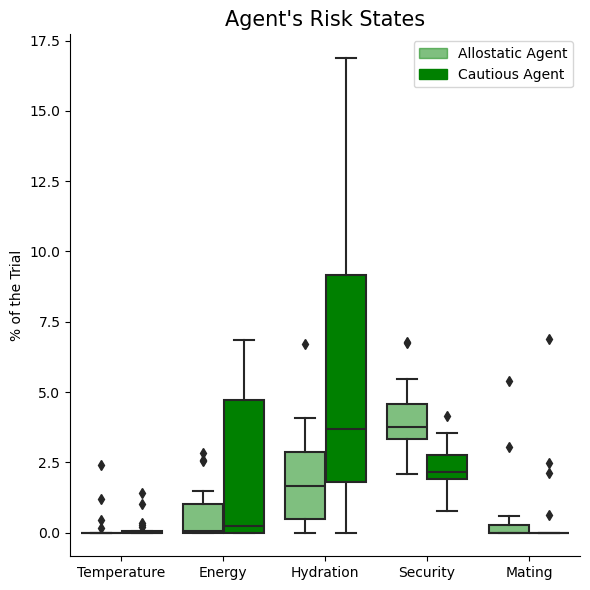

In [229]:
#  Define your data
data = {
    'Group': ['Allostatic Agent'] * allostatic_n_experiments + ['Cautious Agent'] * control_n_experiments,
    'Temperature': allostatic_risk_percents_temperature + allostaticSec_risk_percents_temperature,
    'Energy': allostatic_risk_percents_energy + allostaticSec_risk_percents_energy,
    'Hydration': allostatic_risk_percents_hydration + allostaticSec_risk_percents_hydration,
    'Security': allostatic_risk_percents_security + allostaticSec_risk_percents_security,
    'Mating': allostatic_risk_percents_mating + allostaticSec_risk_percents_mating
}

# Define group colors and alpha levels
custom_palette = {
    'Allostatic Agent': 'green',
    'Cautious Agent': 'green'
}
group_alphas = {
    'Allostatic Agent': 0.5,
    'Cautious Agent': 1.0
}

# Create the DataFrame and melt it
df = pd.DataFrame(data)
df_long = df.melt(id_vars='Group', var_name='Need', value_name='% of the Trial')

# Create plot
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=df_long, x='Need', y='% of the Trial', hue='Group', palette=custom_palette)
plt.title("Agent's Risk States", fontsize=15)

# Apply alpha manually per group
n_variables = df_long['Need'].nunique()
groups = list(group_alphas.keys())

# Loop over each box patch and apply corresponding alpha
for i, patch in enumerate(ax.patches):
    group_index = i % len(groups)
    group_name = groups[group_index]
    base_color = sns.color_palette([custom_palette[group_name]])[0]
    alpha = group_alphas[group_name]
    patch.set_facecolor((*base_color, alpha))

# Create custom legend with log-scaled alphas
legend_patches = [
    mpatches.Patch(color=to_rgba(custom_palette['Allostatic Agent'], alpha=group_alphas['Allostatic Agent']), label='Allostatic Agent'),
    mpatches.Patch(color=to_rgba(custom_palette['Cautious Agent'], alpha=group_alphas['Cautious Agent']), label='Cautious Agent')
]

# Remove the 'Group' title from the legend
ax.legend(handles=legend_patches, title=None)

# Remove the 'Need' title from the x-axis
ax.set_xlabel('')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig("Plots/Risk.pdf", format='pdf', bbox_inches='tight')
plt.savefig("Plots/Risk.png", format='png', bbox_inches='tight')
plt.show()

## TO DO

-  Analysis of security and other internal states.

In [57]:
trial = 0

min_IS = []

for i in range(len(allostatic_IS_security[trial])):
    min_IS.append(min([allostatic_IS_temperature[trial][i], allostatic_IS_hydration[trial][i], allostatic_IS_energy[trial][i], allostatic_IS_mating[trial][i]]))

In [61]:
from scipy.stats import pearsonr   

print(pearsonr(min_IS,allostatic_IS_security[trial]))

PearsonRResult(statistic=0.1454758655959054, pvalue=3.4312710131416732e-77)


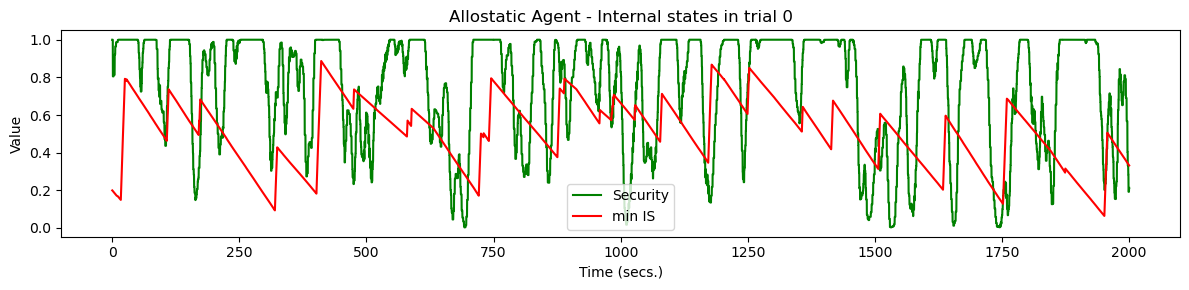

In [58]:

x = allostatic_trial_time[trial]

plt.figure(figsize=(12, 3))
plt.plot(x, allostatic_IS_security[trial], label='Security', color= 'Green')
plt.plot(x, min_IS, label='min IS', color= 'red')

# Labels and legend
plt.xlabel('Time (secs.)')
plt.ylabel('Value')
plt.title('Allostatic Agent - Internal states in trial ' + str(trial))
plt.legend()
plt.tight_layout()
plt.show()

I want to cluster the minIS (not considering security), i.e. urgency, given the level of security.
I expect to see that urgency levels are higher when security is low.

In [38]:
security_thresholds = []
threshold = 0.0
for i in range(101):
    security_thresholds.append(round(threshold,2))
    threshold += 0.01

In the following cells, NaN values are due to the lack of data for a given security threshold.

During that trial, the agent did nor recorded security ISs on that threshold.

In [39]:
control_urgencies = []
control_security_ISs = []

for exp in range(len(control_IS_temperature)): #For every experiment create empty lists
    min_ISs = []
    security_ISs = []

    for i in range(len(security_thresholds) -1): #For every threshold create empty ist
        cluster_min_ISs = []
        cluster_security_ISs = []

        for j in range(len(control_IS_temperature[exp])): #For every threshold, check each timestep and find the min IS that belong to that threshold.
            if control_IS_security[exp][j] >= security_thresholds[i] and control_IS_security[exp][j] < security_thresholds[i+1]:
                cluster_min_ISs.append(min([control_IS_temperature[exp][j], control_IS_hydration[exp][j], control_IS_energy[exp][j], control_IS_mating[exp][j]]))
                cluster_security_ISs.append(control_IS_security[exp][j])

        min_ISs.append(1 - np.mean(cluster_min_ISs))
        security_ISs.append(1 - np.mean(cluster_security_ISs))

    control_urgencies.append([2 if np.isnan(x) else x for x in min_ISs])
    control_security_ISs.append(security_ISs)

/home/oguerrero/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/oguerrero/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [40]:
allostatic_urgencies = []
allostatic_security_ISs = []

for exp in range(len(allostatic_IS_temperature)): #For every experiment create empty lists
    min_ISs = []
    security_ISs = []

    for i in range(len(security_thresholds) -1): #For every threshold create empty ist
        cluster_min_ISs = []
        cluster_security_ISs = []

        for j in range(len(allostatic_IS_temperature[exp])): #For every threshold, check each timestep and find the min IS that belong to that threshold.
            if allostatic_IS_security[exp][j] >= security_thresholds[i] and allostatic_IS_security[exp][j] < security_thresholds[i+1]:
                cluster_min_ISs.append(min([allostatic_IS_temperature[exp][j], allostatic_IS_hydration[exp][j], allostatic_IS_energy[exp][j], allostatic_IS_mating[exp][j]]))
                cluster_security_ISs.append(allostatic_IS_security[exp][j])

        min_ISs.append(1 - np.mean(cluster_min_ISs))
        security_ISs.append(1 - np.mean(cluster_security_ISs))

    allostatic_urgencies.append([2 if np.isnan(x) else x for x in min_ISs])
    allostatic_security_ISs.append(security_ISs)

Experiment 0
Cluster 7
Min_ISs []
cluster_security_ISs []
security_thresholds[i] 0.07

Experiment 19
Cluster 0
Min_ISs []
cluster_security_ISs []
security_thresholds[i] 0.0



In [41]:
allostaticSec_urgencies = []
allostaticSec_security_ISs = []

for exp in range(len(allostaticSec_IS_temperature)): #For every experiment create empty lists
    min_ISs = []
    security_ISs = []

    for i in range(len(security_thresholds) -1): #For every threshold create empty ist
        cluster_min_ISs = []
        cluster_security_ISs = []

        for j in range(len(allostaticSec_IS_temperature[exp])): #For every threshold, check each timestep and find the min IS that belong to that threshold.
            if allostaticSec_IS_security[exp][j] >= security_thresholds[i] and allostaticSec_IS_security[exp][j] < security_thresholds[i+1]:
                cluster_min_ISs.append(min([allostaticSec_IS_temperature[exp][j], allostaticSec_IS_hydration[exp][j], allostaticSec_IS_energy[exp][j], allostaticSec_IS_mating[exp][j]]))
                cluster_security_ISs.append(allostaticSec_IS_security[exp][j])

        min_ISs.append(1 - np.mean(cluster_min_ISs))
        security_ISs.append(1 - np.mean(cluster_security_ISs))

    allostaticSec_urgencies.append([2 if np.isnan(x) else x for x in min_ISs])
    allostaticSec_security_ISs.append(security_ISs)

In [48]:
control_urgency_cluster = list(np.concatenate(control_urgencies))
allostatic_urgency_cluster = list(np.concatenate(allostatic_urgencies))
allostaticSec_urgency_cluster = list(np.concatenate(allostaticSec_urgencies))

control_y = security_thresholds[:-1] *20
allostatic_y = security_thresholds[:-1] *20

In [49]:
count = 0

for i in range(len(control_urgency_cluster)):
    if control_urgency_cluster[i - count] > 1:
        del control_urgency_cluster[i - count]
        del control_y[i - count]
        count +=1


count = 0

for i in range(len(allostatic_urgency_cluster)):
    if allostatic_urgency_cluster[i - count] > 1:
        del allostatic_urgency_cluster[i - count]
        del allostatic_y[i - count]
        count +=1

In [51]:
def plot_urgency_security_correlation(allostatic_mean_cluster, control_mean_cluster, allostatic_y, control_y, cluster_thresholds, internal_state, color):
    x0 = allostatic_mean_cluster
    x1 = control_mean_cluster
    y0 = allostatic_y
    y1 = control_y

    print('x0 size =', len(x0))
    print('x1 size =', len(x1))
    print('y0 size =', len(y0))
    print('y1 size =', len(y1))
    
    plt.figure(figsize=(5, 4))
    plt.scatter(x0, y0, color=color, label='Allostatic Agent', alpha=0.2)
    plt.scatter(x1, y1, color='gray', label='Control Agent', alpha=0.2)
    
    r0, p0 = pearsonr(x0, y0)
    slope0, intercept0, *_ = linregress(x0, y0)
    line0 = slope0 * np.array(x0) + intercept0
    
    r1, p1 = pearsonr(x1, y1)
    slope1, intercept1, *_ = linregress(x1, y1)
    line1 = slope1 * np.array(x1) + intercept1
    
    plt.plot(x1, line1, color='gray', linestyle='-', label=f'Fit (r = {r1:.3f})')
    plt.plot(x0, line0, color=color, linestyle='-', label=f'Fit (r = {r0:.3f})')
    
    plt.xlabel('Agent ' + internal_state)
    plt.ylabel('Security')
    plt.ylim(0, 1)
    plt.title('Agent ' + internal_state + ' vs. Security', fontsize=15)
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

x0 size = 1998
x1 size = 1998
y0 size = 1998
y1 size = 1998


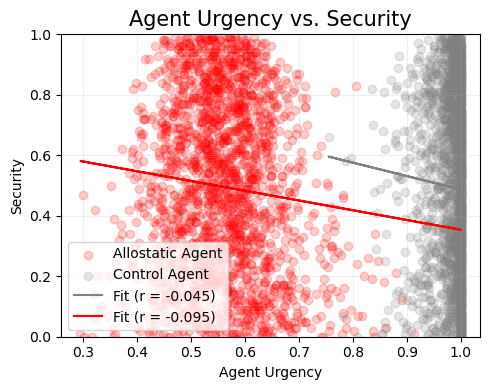

In [52]:
plot_urgency_security_correlation(allostatic_urgency_cluster, control_urgency_cluster, allostatic_y, control_y, security_thresholds, 'Urgency', 'red')